### Newton's method with Continuation method

Implementing the continuation method with Newton's iteration to find the zero of the function $f(x) = arctan(x)$. This method ensures better convergence by transitioning from a known zero of a simpler function to the desired zero of the target function. 

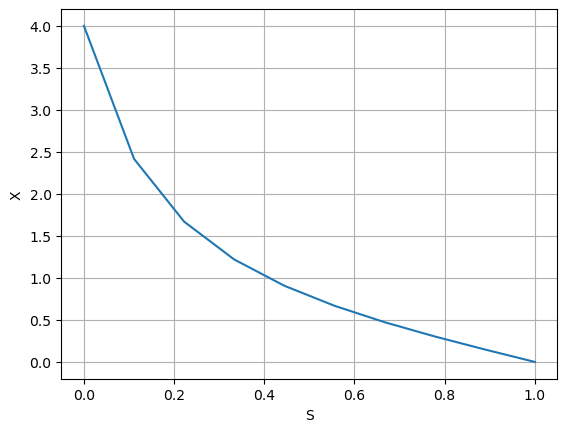

In [91]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return np.arctan(x)


def H(x, s):
     return np.arctan(x) - (1 - s) * np.arctan(4)


def dH(x):
    return 1 / (1 + x**2)


def newton(x0, H, dH, s, tol=10**(-10), steps=50):
    x = x0
    for step in range(steps):
        H_value = H(x, s)
        dH_value = dH(x)
        if abs(H_value) < tol:
            break
        x = x - H_value / dH_value
    return x


x_values = [4]
s_values = np.linspace(0, 1, 10)

for s in s_values[1:]:
    x_old = x_values[-1]
    x_new = newton(x_old, H, dH, s)
    x_values.append(x_new)

plt.plot(s_values, x_values)
plt.xlabel('S')
plt.ylabel('X')
plt.grid()
plt.show()





Observation: 

Plot Behavior:
 - As $s$ progresses from 0 to 1, the root $x$ decreases gradually from 4 to the actual root of $arctan⁡(x)=0$ which is $x=0$.

Importance of the Continuation Method:
 - The continuation method allows Newton's method to converge reliably by gradually transitioning from an easier problem $(s=0)$ to the final problem $(s=1)$.

Newton's Method Convergence:
 - Without the continuation method, starting Newton's method directly at $x_0=4$ for $f(x)=arctan⁡(x)$ might fail because the initial guess is far from the root.

### Linear vs Quadratic Convergance

Investigating the convergence behavior of a sequence $(x_n)$, specifically for linear and quadratic convergence:

1. Linear Convergence:
        $$x_{n+1} ≤ q x_n$$, where $q∈(0,1)$.
Convergence rate: Slow and proportional to $q$.

2. Quadratic Convergence:
        $$x_{n+1}≤ C x_n^2$$, where $C>0$.

Convergence rate: Fast, as the error shrinks quadratically at each step.

The semilogy plot helps visualize the difference between linear and quadratic convergence.

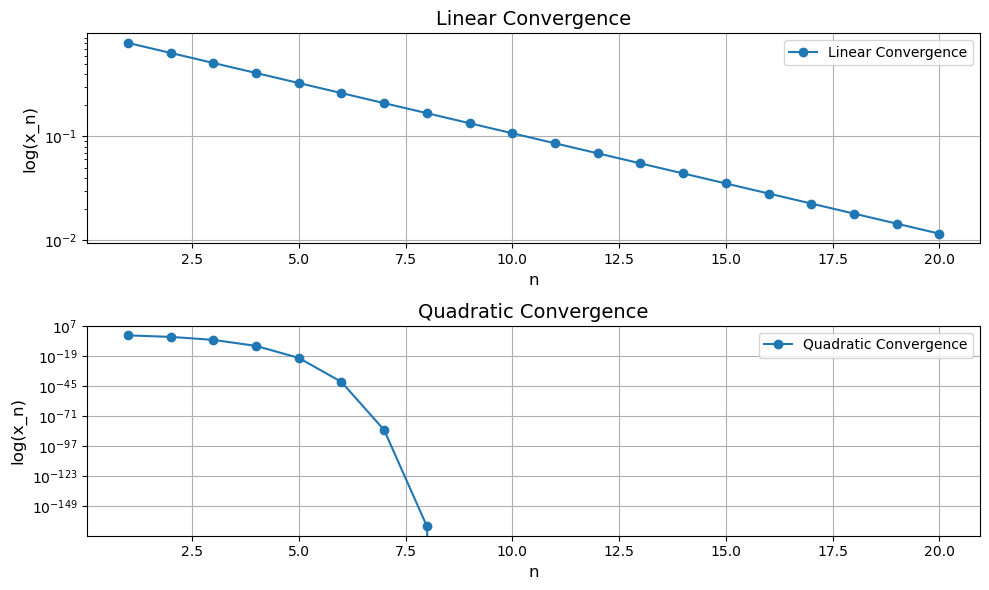

In [15]:
import numpy as np
import matplotlib.pyplot as plt


n_values = np.arange(1, 21)  


q = 0.8  
x0_linear = 1.0
x_linear = [x0_linear * q**n for n in n_values]

C = 0.5 
x0_quadratic = 0.1
x_quadratic = [x0_quadratic]
for n in range(1, len(n_values)):
    x_next = C * x_quadratic[-1]**2
    x_quadratic.append(x_next)

plt.figure(figsize=(10, 6))

# Linear convergence
plt.subplot(2, 1, 1)
plt.semilogy(n_values, x_linear, 'o-', label="Linear Convergence")
plt.xlabel("n", fontsize=12)
plt.ylabel("log(x_n)", fontsize=12)
plt.title("Linear Convergence", fontsize=14)
plt.grid(True)
plt.legend()

# Quadratic convergence
plt.subplot(2, 1, 2)
plt.semilogy(n_values, x_quadratic, 'o-', label="Quadratic Convergence")
plt.xlabel("n", fontsize=12)
plt.ylabel("log(x_n)", fontsize=12)
plt.title("Quadratic Convergence", fontsize=14)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Observation:
Linear Convergence:
 - The semilogy plot for linear convergence is approximately a straight line.
 - The slow, steady decay of $x_n$ highlights the proportional rate of convergence.

Quadratic Convergence:
 - The semilogy plot for quadratic convergence bends steeply downward.
 - This reflects the rapid decay of $x_n$, where the error shrinks much faster compared to linear convergence.

Significance of Semilogy Plot:
 - The semilogy plot clearly distinguishes between linear and quadratic convergence:

           Linear: Straight line.
           Quadratic: Curve with increasing steepness.

### Implementing steepest descent method

Implement the steepest descent method with Armijo step-size control for minimizing the quadratic function:
                        $$f(x,y)=4x^2−4xy+2y^2$$

Starting from an initial guess $(2, 3)^T$, we want to:
- Monitor the error (distance to the minimum at $(0,0)^T$ as a function of iteration number.
- Plot the error in a semilogy format and analyze the convergence behavior.

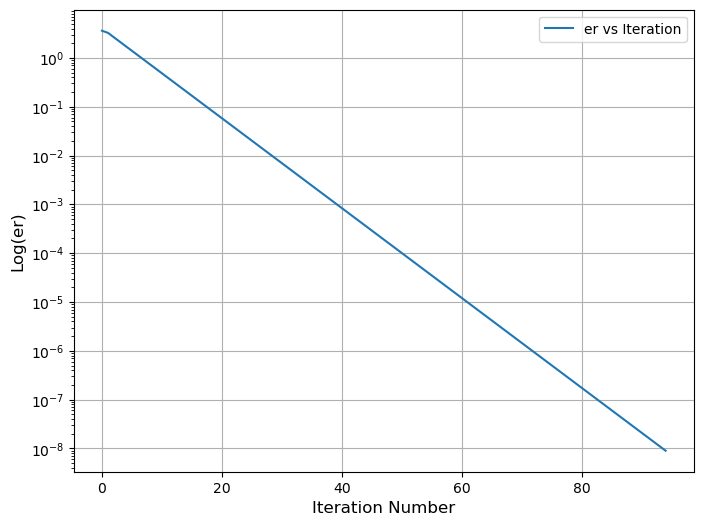

In [101]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return 4 * x**2 - 4 * x * y + 2 * y**2

def grad_f(x, y):
    df_dx = 8 * x - 4 * y
    df_dy = -4 * x + 4 * y
    return np.array([df_dx, df_dy])

def armijo_rule(x, grad, s=0.9, q=0.5):
    alpha = 1.0 
    while True:
        new_x = x - alpha * grad
        if f(new_x[0], new_x[1]) <= f(x[0], x[1]) - s * alpha * np.linalg.norm(grad)**2:
            break
        alpha *= q
    return alpha

def steepest_descent(x0, t=1e-8, m=100):
    x = x0
    errs = []
    i = 0
    while i < m:
        grad = grad_f(x[0], x[1])
        er = np.linalg.norm(x - np.array([0, 0]))
        errs.append(er)

        if er < t:
            break

        alpha = armijo_rule(x, grad)
        x = x - alpha * grad
        i += 1

    return x, errs

x0 = np.array([2.0, 3.0])
solution, errs = steepest_descent(x0)

plt.figure(figsize=(8, 6))
plt.semilogy(range(len(errs)), errs, label='er vs Iteration')
plt.xlabel('Iteration Number', fontsize=12)
plt.ylabel('Log(er)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


Observation: 

Error Decay:
 - The error decreases linearly in the semilogy plot, indicating that the method achieves linear convergence.

Armijo Step-Size Control:
 - The adaptive step size ensures sufficient descent without overshooting the minimum, improving stability.

Convergence:
 - The steepest descent method converges to the global minimum $(0,0)$ successfully.

Why Linear Convergence?
 - The steepest descent method often exhibits linear convergence for smooth convex problems because it uses the gradient direction without exploiting higher-order curvature information.

### Secant method vs Newton's Method

(a) Use the Secant Method
 Compute the positive root $x^*$ of the function $F(x) = 2 - x^2 - e^x$ to machine precision $epsilon= 2 \cdot 10^{-16}$.

(b) Compute the Experimental Order of Convergence
 Determine the experimental order of convergence for the Secant method using:
$$
\rho_n = \frac{\log|x_{n+1} - x^*| - \log|x_{n+2} - x^*|}{\log|x_n - x^*| - \log|x_{n+1} - x^*|}.
$$

(c) Compare the Efficiency of Secant and Newton's Methods
 Compare the efficiency of the Secant method and Newton's method based on function evaluations.


Root (Secant Method): 0.5372744491738566, Iterations: 27, Function Evaluations: 54
Root (Newton Method): 0.5372744491738566, Iterations: 20, Function Evaluations: 60


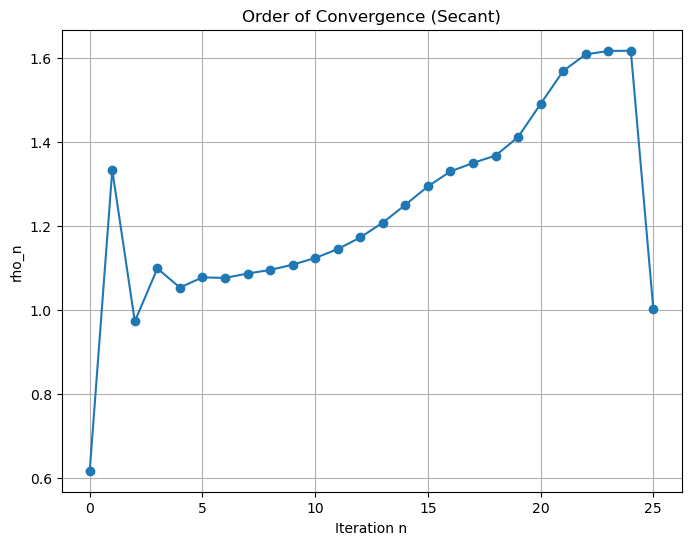

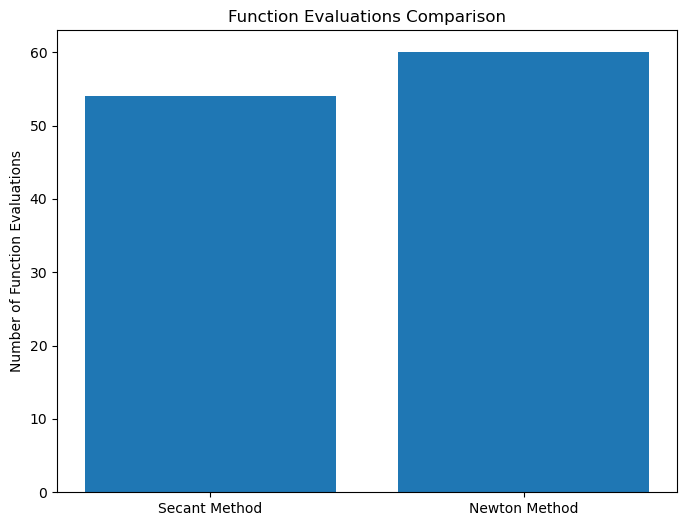

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def F(x):
    return 2 - x**2 - np.exp(x)

def F_der(x):
    return -2*x - np.exp(x)

def secant_method(x0, x1, tol=2 * 10**(-16), max_iter=100):
    iter_count = 0
    x_vals = [x0, x1]
    while abs(x_vals[-1] - x_vals[-2]) > tol and iter_count < max_iter:
        x_n = x_vals[-1] - (x_vals[-1] - x_vals[-2]) / (F(x_vals[-1]) - F(x_vals[-2])) * F(x_vals[-1])
        x_vals.append(x_n)
        iter_count += 1
    return x_vals, iter_count

def newton_method(x0, tol=2 * 10**(-16), max_iter=100):
    iter_count = 0
    x_vals = [x0]
    while True:
        x_new = x_vals[-1] - F(x_vals[-1]) / F_der(x_vals[-1])
        x_vals.append(x_new)
        iter_count += 1
        if abs(x_vals[-1] - x_vals[-2]) <= tol or iter_count >= max_iter:
            break
    return x_vals, iter_count

def order_of_convergence(x_vals, x_star):
    rhos = []
    for n in range(len(x_vals) - 3):
        num = np.log(abs(x_vals[n+1] - x_star)) - np.log(abs(x_vals[n+2] - x_star))
        den = np.log(abs(x_vals[n] - x_star)) - np.log(abs(x_vals[n+1] - x_star))
        rhos.append(num / den)
    return rhos


tol = 2e-16
x0 = 15
x1 = x0 - F(x0) / F_der(x0)  


secant_vals, secant_iters = secant_method(x0, x1, tol)
x_star_secant = secant_vals[-1]


newton_vals, newton_iters = newton_method(x0, tol)
x_star_newton = newton_vals[-1]


rhos_secant = order_of_convergence(secant_vals, x_star_secant)


secant_func_evals = 2 * secant_iters
newton_func_evals = 3 * newton_iters


print(f"Root (Secant Method): {x_star_secant:.16f}, Iterations: {secant_iters}, Function Evaluations: {secant_func_evals}")
print(f"Root (Newton Method): {x_star_newton:.16f}, Iterations: {newton_iters}, Function Evaluations: {newton_func_evals}")


plt.figure(figsize=(8, 6))
plt.plot(range(len(rhos_secant)), rhos_secant, marker='o')
plt.title('Order of Convergence (Secant)')
plt.xlabel('Iteration n')
plt.ylabel('rho_n')
plt.grid()
plt.show()


plt.figure(figsize=(8, 6))
plt.bar(['Secant Method', 'Newton Method'], [secant_func_evals, newton_func_evals])
plt.title('Function Evaluations Comparison')
plt.ylabel('Number of Function Evaluations')
plt.show()

Observation:

1. Root:
  - The root $x^∗$ is approximately 0.53727 (computed by both methods).

2. Iterations:
  - Secant method: 27 iterations.
  - Newton's method: 20 iterations.

3. Function Evaluations:
  - Secant method: 54 evaluations (2 per iteration).
  - Newton's method: 60 evaluations (3 per iteration).

4. Experimental Order of Convergence:
  - The order of convergence for the Secant method approaches 1.6 in the later iterations, matching the theoretical value.

5. Efficiency Comparison:
  - While Newton's method converges faster (fewer iterations), the Secant method is more efficient in terms of total function evaluations.

### Newton's Method vs Halley

(a) Use Newton's method to compute the root x∗ of $F(x)=2−x^2−e^x$ to machine precision. Count the number of iterations.

(b) Use Halley's method to compute the same root x∗ to machine precision. Count the number of iterations.

(c) Compare the experimental order of convergence for both methods. Plot the errors and analyze the behavior of convergence.

/var/folders/q5/334krj5d7bbbgbzjh_x1g3g80000gn/T/ipykernel_22455/454396712.py:44: RuntimeWarning: divide by zero encountered in log
  num = np.log(errors[i + 1] / errors[i])
/var/folders/q5/334krj5d7bbbgbzjh_x1g3g80000gn/T/ipykernel_22455/454396712.py:44: RuntimeWarning: divide by zero encountered in scalar divide
  num = np.log(errors[i + 1] / errors[i])
/var/folders/q5/334krj5d7bbbgbzjh_x1g3g80000gn/T/ipykernel_22455/454396712.py:45: RuntimeWarning: divide by zero encountered in log
  den = np.log(errors[i] / errors[i - 1])
/var/folders/q5/334krj5d7bbbgbzjh_x1g3g80000gn/T/ipykernel_22455/454396712.py:46: RuntimeWarning: invalid value encountered in scalar divide
  orders.append(num / den)


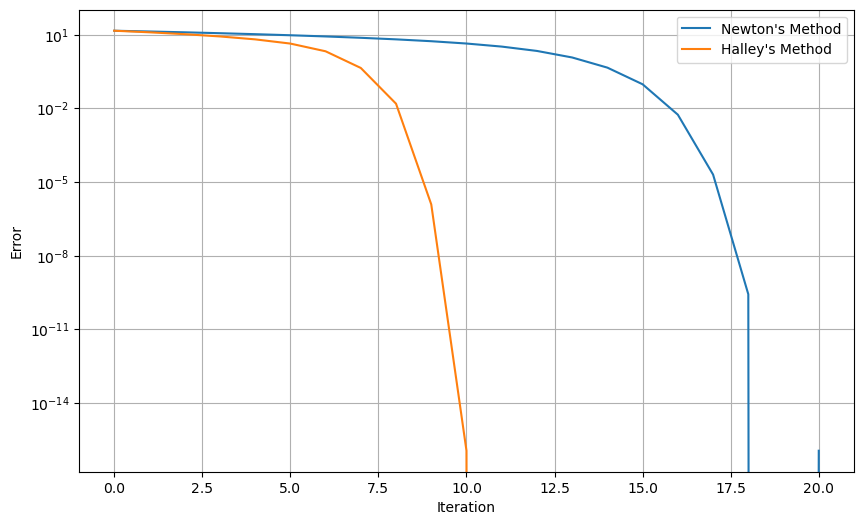

In [34]:
import numpy as np
import matplotlib.pyplot as plt

## Target function
def F(x):
    return 2 - x**2 - np.exp(x)

## First derivative
def F_1(x):
    return -2*x - np.exp(x)

## Second derivative
def F_2(x):
    return -2 - np.exp(x)


def newton1(x0, tol=1e-15, max_iter=100): ## Newton's method
    x = x0
    iterations = [x]
    for i in range(max_iter):
        x_new = x - F(x) / F_1(x)
        iterations.append(x_new)
        if abs(x_new - x) < tol:
            break
        x = x_new
    return x, iterations

def halley(x0, tol=1e-15, max_iter=100): ## Halley's method
    x = x0
    iterations = [x]
    for i in range(max_iter):
        numerator = 2 * F(x) * F_1(x)
        denominator = 2 * F_1(x)**2 - F(x) * F_2(x)
        x_new = x - numerator / denominator
        iterations.append(x_new)
        if abs(x_new - x) < tol:
            break
        x = x_new
    return x, iterations

def order_of_convergence1(errors): 
    orders = []
    for i in range(1, len(errors) - 1):
        num = np.log(errors[i + 1] / errors[i])
        den = np.log(errors[i] / errors[i - 1])
        orders.append(num / den)
    return orders

x0 = 15

root_newton, newton_iterations = newton1(x0)
root_halley, halley_iterations = halley_method(x0)


true_root = root_newton  
newton_errors = [abs(x - true_root) for x in newton_iterations]
halley_errors = [abs(x - true_root) for x in halley_iterations]

newton_orders = order_of_convergence1(newton_errors)
halley_orders = order_of_convergence1(halley_errors)

plt.figure(figsize=(10, 6))
plt.semilogy(range(len(newton_errors)), newton_errors, label="Newton's Method")
plt.semilogy(range(len(halley_errors)), halley_errors, label="Halley's Method")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()


Observation:
1. Newton's Method:
 - The error decreases quadratically, as seen from the gentle slope of the curve.
 - It takes more iterations to achieve machine precision compared to Halley's method.

2. Halley's Method:

 - The error decreases cubically, shown by the very steep slope in the plot.
 - Halley's method converges significantly faster, requiring fewer iterations to achieve machine precision.

3. Comparison:
 - Halley's method is faster because it exploits the second derivative, allowing it to "accelerate" the convergence.
 - Newton's method is still efficient but converges slower (quadratic convergence) compared to Halley's cubic convergence.